In [2]:
import sys
print(sys.version)
print(sys.path)

3.6.8 |Anaconda custom (64-bit)| (default, Dec 29 2018, 19:04:46) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
['', '/anaconda3/lib/python36.zip', '/anaconda3/lib/python3.6', '/anaconda3/lib/python3.6/lib-dynload', '/Users/canaguier/.local/lib/python3.6/site-packages', '/Users/canaguier/.local/lib/python3.6/site-packages/iutils-0.1.1-py3.6.egg', '/anaconda3/lib/python3.6/site-packages', '/anaconda3/lib/python3.6/site-packages/aeosa', '/anaconda3/lib/python3.6/site-packages/IPython/extensions', '/Users/canaguier/.ipython']


In [3]:
a = !pwd
sys.path.insert(0, '/Users/canaguier/Desktop/LKB/multiple_scattering')
print(sys.path)

['/Users/canaguier/Desktop/LKB/multiple_scattering', '', '/anaconda3/lib/python36.zip', '/anaconda3/lib/python3.6', '/anaconda3/lib/python3.6/lib-dynload', '/Users/canaguier/.local/lib/python3.6/site-packages', '/Users/canaguier/.local/lib/python3.6/site-packages/iutils-0.1.1-py3.6.egg', '/anaconda3/lib/python3.6/site-packages', '/anaconda3/lib/python3.6/site-packages/aeosa', '/anaconda3/lib/python3.6/site-packages/IPython/extensions', '/Users/canaguier/.ipython']


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
from math import factorial as fact
from scipy.special import jv
from scipy.special import lpmv
import collective_Smatrix

In [5]:
x = np.linspace(0, 0.2, 3)
l = 2
for m in range(l+1):
    print(np.round(lpmv(m, 2, x), 4))

[-0.5   -0.485 -0.44 ]
[ 0.     -0.2985 -0.5879]
[ 3.    2.97  2.88]


In [6]:
x = 0.1
z = np.zeros(l+1)
for m in range(l+1):
    z[m] = lpmv(m,l,x)
print(z)

[-0.485      -0.29849623  2.97      ]


In [7]:
importlib.reload(collective_Smatrix)
u_rho = collective_Smatrix.eval_u1(2*2, [1, 1, 1])
print(u_rho)

[ 0.00000000+0.j          0.00000000+0.j          0.00000000+0.j
  0.00000000+0.j          0.16075457+0.j          0.00000000+0.j
  0.00000000+0.j          0.00000000+0.j          0.00000000+0.j
  0.00000000+0.j          0.00000000+0.j          0.00000000+0.j
  0.08411823-0.08411823j  0.11896113+0.j         -0.08411823-0.08411823j
  0.00000000+0.j          0.00000000+0.j          0.00000000+0.j
  0.00000000+0.j          0.00000000+0.j          0.00000000-0.0413459j
  0.04134590-0.0413459j   0.00000000+0.j         -0.04134590-0.0413459j
  0.00000000+0.0413459j   0.00000000+0.j          0.00000000+0.j
  0.00000000+0.j         -0.00670952-0.00670952j  0.00000000-0.0164349j
  0.00519717-0.00519717j -0.01200236+0.j         -0.00519717-0.00519717j
  0.00000000+0.0164349j   0.00670952-0.00670952j  0.00000000+0.j
 -0.00163198-0.j         -0.00230797-0.00230797j  0.00000000-0.00246732j
 -0.00087233+0.00087233j -0.00273082+0.j          0.00087233+0.00087233j
  0.00000000+0.00246732j  0.00230797-

In [8]:
alpha = np.arange(2+2+1)
lmax = 2
m1, m2 = 1, 1
ind = alpha*(4*lmax+1)+m2-m1+2*lmax
print(ind)

[ 4 13 22 31 40]


In [9]:
u = u_rho[ind]
print(u)

[ 0.16075457+0.j  0.11896113+0.j  0.00000000+0.j -0.01200236+0.j
 -0.00273082+0.j]


In [10]:
importlib.reload(collective_Smatrix)
l1, l2 = 2, 2
m1, m2 = 1, 1
print(collective_Smatrix.CG_coeff(l1, m1, l2, m2))

[ 0.          0.         -0.65465367  0.          0.75592895  0.        ]


In [11]:
importlib.reload(collective_Smatrix)
l1, l2 = 2, 2
m1, m2 = -1, -1
print(collective_Smatrix.a_coeff(l1, m1, l2, m2))

[ 0.         -0.          0.27033563  0.          0.25487487]


In [12]:
importlib.reload(collective_Smatrix)
pos = [1, 1, 1]
lmax = 2

u1 = collective_Smatrix.eval_u1(lmax, pos)
print(u1.shape, u1)

(15,) [ 0.00000000+0.j          0.00000000+0.j          0.16075457+0.j
  0.00000000+0.j          0.00000000+0.j          0.00000000+0.j
  0.08411823-0.08411823j  0.11896113+0.j         -0.08411823-0.08411823j
  0.00000000+0.j          0.00000000-0.0413459j   0.04134590-0.0413459j
  0.00000000+0.j         -0.04134590-0.0413459j   0.00000000+0.0413459j ]


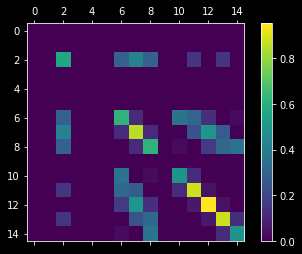

In [13]:
importlib.reload(collective_Smatrix)
rho = [1, 1, 1]
lmax = 2
A = collective_Smatrix.Arho_matrix(rho, lmax)
fig, ax = plt.subplots()
pos = ax.matshow(np.abs(np.real(A)), vmin=0)
fig.colorbar(pos)
plt.show()

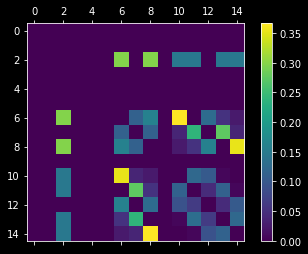

In [14]:
fig, ax = plt.subplots()
pos = ax.matshow(np.abs(np.imag(A)), vmin=0)
fig.colorbar(pos)
plt.show()

In [15]:
importlib.reload(collective_Smatrix)
rho = [1, 1, 1]
lmax = 2
C = collective_Smatrix.Crho_matrix(rho, lmax)
print(C.shape)

(10, 10)


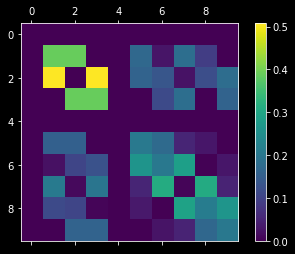

In [16]:
fig, ax = plt.subplots()
pos = ax.matshow(np.abs(np.abs(C)), vmin=0)
fig.colorbar(pos)
plt.show()

In [17]:
importlib.reload(collective_Smatrix)
rho = [1, 1, 1]
lmax = 2
B = collective_Smatrix.Brho_matrix(rho, lmax)
print(B.shape)

(10, 10)


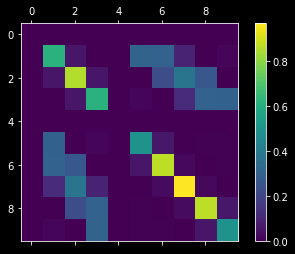

In [18]:
fig, ax = plt.subplots()
pos = ax.matshow(np.abs(np.real(B)), vmin=0)
fig.colorbar(pos)
plt.show()

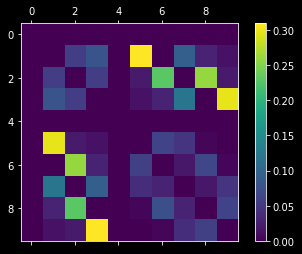

In [19]:
fig, ax = plt.subplots()
pos = ax.matshow(np.abs(np.imag(B)), vmin=0)
fig.colorbar(pos)
plt.show()

In [20]:
importlib.reload(collective_Smatrix)
rho = [1, 1, 1]
lmax = 2
T = collective_Smatrix.translate_reduced(rho, lmax)
print(T.shape)

(20, 20)


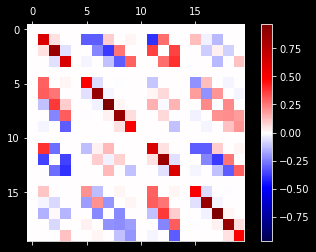

In [21]:
fig, ax = plt.subplots()
v = np.max(np.abs(T))
pos = ax.matshow(np.real(T), cmap='seismic', vmin=-v, vmax=v)
fig.colorbar(pos)
plt.show()

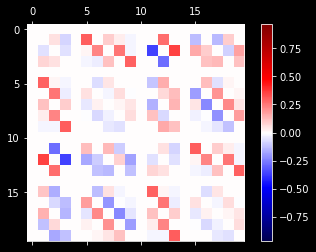

In [22]:
fig, ax = plt.subplots()
v = np.max(np.abs(T))
pos = ax.matshow(np.imag(T), cmap='seismic', vmin=-v, vmax=v)
fig.colorbar(pos)
plt.show()

In [133]:
u = np.linspace(0,1,5)
print(u)

[ 0.    0.25  0.5   0.75  1.  ]


In [148]:
importlib.reload(collective_Smatrix)
pos1 = np.array([0, 0, 0])
pos2 = np.array([1, 1, 0])
R = np.linalg.norm(pos1-pos2)
print(R)
G = collective_Smatrix.eval_green(pos1, pos2)
print(G.shape)

1.41421356237
(3, 3)


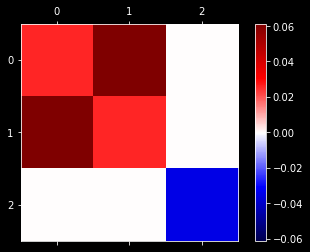

In [149]:
fig, ax = plt.subplots()
v = np.max(np.abs(G))
pos = ax.matshow(np.real(G), cmap='seismic', vmin=-v, vmax=v)
fig.colorbar(pos)
plt.show()

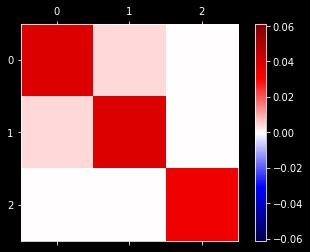

In [150]:
fig, ax = plt.subplots()
v = np.max(np.abs(G))
pos = ax.matshow(np.imag(G), cmap='seismic', vmin=-v, vmax=v)
fig.colorbar(pos)
plt.show()

In [64]:
importlib.reload(collective_Smatrix)
pos1 = np.array([[1, 1, -1]])
pos2 = np.array([[1, 1, 1]])
pos = np.concatenate((pos1.T, pos2.T), axis=1)
eps = 1.33**2
alpha = (eps-1)/(eps+2)*np.ones(2)
lmax = 2
print(pos.shape, alpha.shape)
TQ = collective_Smatrix.matrix_TQdip(pos, alpha, lmax)
print(TQ.shape)

(3, 2) (2,)
(20, 6)


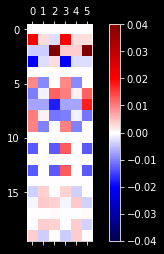

In [65]:
fig, ax = plt.subplots()
v = np.max(np.abs(TQ))
out = ax.matshow(np.real(TQ), cmap='seismic', vmin=-v, vmax=v)
fig.colorbar(out)
plt.show()

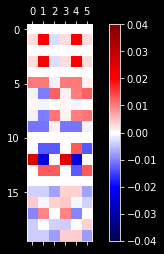

In [66]:
fig, ax = plt.subplots()
v = np.max(np.abs(TQ))
out = ax.matshow(np.imag(TQ), cmap='seismic', vmin=-v, vmax=v)
fig.colorbar(out)
plt.show()

In [54]:
importlib.reload(collective_Smatrix)
pos1 = np.array([[1, 1, -1]])
pos2 = np.array([[1, 1, 1]])
pos = np.concatenate((pos1.T, pos2.T), axis=1)

lmax = 2
print(pos.shape, alpha.shape)
TQ = collective_Smatrix.matrix_TQdip(pos, alpha, lmax)
print(TQ.shape)

[ 0.20401178  0.20401178]


In [72]:
importlib.reload(collective_Smatrix)
pos1 = np.array([[0, 0, -1]])
pos2 = np.array([[0, 0, 1]])
pos = np.concatenate((pos1.T, pos2.T), axis=1)
eps = 1.33**2
alpha = (eps-1)/(eps+2)*np.ones(2)
lmax = 2
print(pos.shape, alpha.shape)
FT = collective_Smatrix.matrix_FTdip(pos, alpha, lmax)
print(FT.shape)

(3, 2) (2,)
(6, 20)


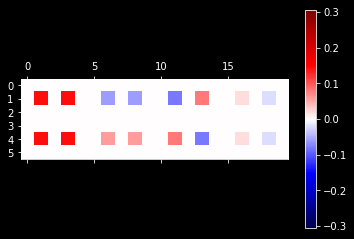

In [73]:
fig, ax = plt.subplots()
v = np.max(np.abs(FT))
out = ax.matshow(np.real(FT), cmap='seismic', vmin=-v, vmax=v)
fig.colorbar(out)
plt.show()

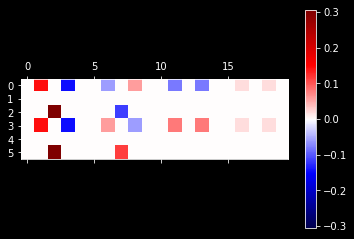

In [74]:
fig, ax = plt.subplots()
v = np.max(np.abs(FT))
out = ax.matshow(np.imag(FT), cmap='seismic', vmin=-v, vmax=v)
fig.colorbar(out)
plt.show()

In [81]:
importlib.reload(collective_Smatrix)
pos1 = np.array([[1, 0, 0]])
pos2 = np.array([[0, 1, 0]])
pos = np.concatenate((pos1.T, pos2.T), axis=1)
eps = 1.33**2
alpha = (eps-1)/(eps+2)*np.ones(2)
print(pos.shape, alpha.shape)
X = collective_Smatrix.matrix_Xdip(pos, alpha)
print(X.shape)

(3, 2) (2,)
(6, 6)


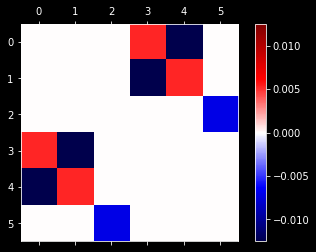

In [82]:
fig, ax = plt.subplots()
v = np.max(np.abs(X))
out = ax.matshow(np.real(X), cmap='seismic', vmin=-v, vmax=v)
fig.colorbar(out)
plt.show()

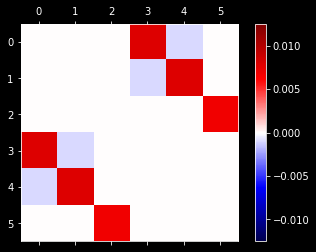

In [83]:
fig, ax = plt.subplots()
v = np.max(np.abs(X))
out = ax.matshow(np.imag(X), cmap='seismic', vmin=-v, vmax=v)
fig.colorbar(out)
plt.show()

In [102]:
importlib.reload(collective_Smatrix)
pos1 = np.array([[1, 0, 0]])
pos2 = np.array([[0, 0, 1]])
pos = np.concatenate((pos1.T, pos2.T), axis=1)
eps = 1.33**2
alpha = (eps-1)/(eps+2)*np.ones(2)
lmax = 2
print(pos.shape, alpha.shape)
S = collective_Smatrix.matrix_Sdip(pos, alpha, lmax)
print(D.shape)

(3, 2) (2,)
(20, 20)


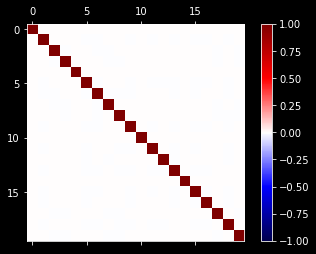

In [103]:
fig, ax = plt.subplots()
v = np.max(np.abs(D))
out = ax.matshow(np.real(S), cmap='seismic', vmin=-v, vmax=v)
fig.colorbar(out)
plt.show()

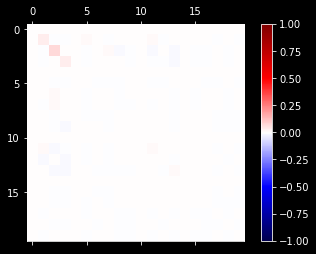

In [104]:
fig, ax = plt.subplots()
v = np.max(np.abs(D))
out = ax.matshow(np.imag(S), cmap='seismic', vmin=-v, vmax=v)
fig.colorbar(out)
plt.show()

In [110]:
N = 4
pos = np.zeros((3,N))
pos[:,0] = [ 1/2, 1/2, 1/2]
pos[:,1] = [ 1/2,-1/2,-1/2]
pos[:,2] = [-1/2, 1/2,-1/2]
pos[:,3] = [-1/2,-1/2, 1/2]
print(pos)

[[ 0.5  0.5 -0.5 -0.5]
 [ 0.5 -0.5  0.5 -0.5]
 [ 0.5 -0.5 -0.5  0.5]]
